# **Using native R on Google Colab**

Chanin Nantasenamat

<i>Data Professor YouTube channel, http://youtube.com/dataprofessor </i>

In this Jupyter notebook, I will be showing you how to use native R right inside Google Colab.

[Use R on Google Colab!](https://colab.research.google.com/notebook#create=true&language=r)

**Remember to upload winequality-red.csv to 'Files' on left**


### Installing libraries

In [ ]:
install.packages('caret')
install.packages('mlbench')
install.packages('glm')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘data.table’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘plyr’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘glm’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


### Importing libraries

In [ ]:
library(caret)
library(mlbench)
library(glm)

Loading required package: lattice

Loading required package: ggplot2



### How many CPU cores are there?

In [ ]:
library(parallel)
detectCores(all.tests = FALSE, logical = TRUE)

[1] 2

### Check Version

In [ ]:
version

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          0.3                         
year           2020                        
month          10                          
day            10                          
svn rev        79318                       
language       R                           
version.string R version 4.0.3 (2020-10-10)
nickname       Bunny-Wunnies Freak Out     

---

### Load in Red Wine Dataset
remember to upload red wine .csv to left file structure

In [ ]:
df <- read.csv("winequality-red.csv", sep=";", header=TRUE)
head(df)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


# Regression Methods

Comparing difference for regression methods.

1. Linear Regression (John)
2.  lasso / ridge regression (Yulun)
3.  PCA / PLS (Yulun)
4.  polynomial regression(Arjav)
5.  Decision tree? (John)

[link text](https://)Data Preprocessing and split dataset

In [ ]:
TrainingIndex <- createDataPartition(df$quality, p=0.8, list = FALSE)
TrainingSet <- df[TrainingIndex,] # Training Set
TestingSet <- df[-TrainingIndex,] # Test Set

print("Training and testing split:")
nrow(TrainingSet)
nrow(TestingSet)

head(TrainingSet)

[1] "Training and testing split:"


[1] 1281

[1] 318

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7,7.9,0.60,0.06,1.6,0.069,15,59,0.9964,3.30,0.46,9.4,5


## Linear Regression - Baseline Performance

[1] 0.402033


Call:
lm(formula = quality ~ ., data = TrainingSet)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.63905 -0.37811 -0.04533  0.47067  2.00462 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           24.555009  23.819528   1.031  0.30279    
fixed.acidity          0.009237   0.029178   0.317  0.75162    
volatile.acidity      -0.997857   0.134903  -7.397 2.53e-13 ***
citric.acid           -0.110354   0.164042  -0.673  0.50125    
residual.sugar         0.011865   0.016583   0.715  0.47444    
chlorides             -2.190093   0.472639  -4.634 3.96e-06 ***
free.sulfur.dioxide    0.005065   0.002429   2.085  0.03724 *  
total.sulfur.dioxide  -0.003341   0.000804  -4.155 3.47e-05 ***
density              -19.622786  24.316669  -0.807  0.41984    
pH                    -0.643692   0.216623  -2.971  0.00302 ** 
sulphates              0.907690   0.125615   7.226 8.56e-13 ***
alcohol                0.277392   0.029731   9.330  < 2e-16 

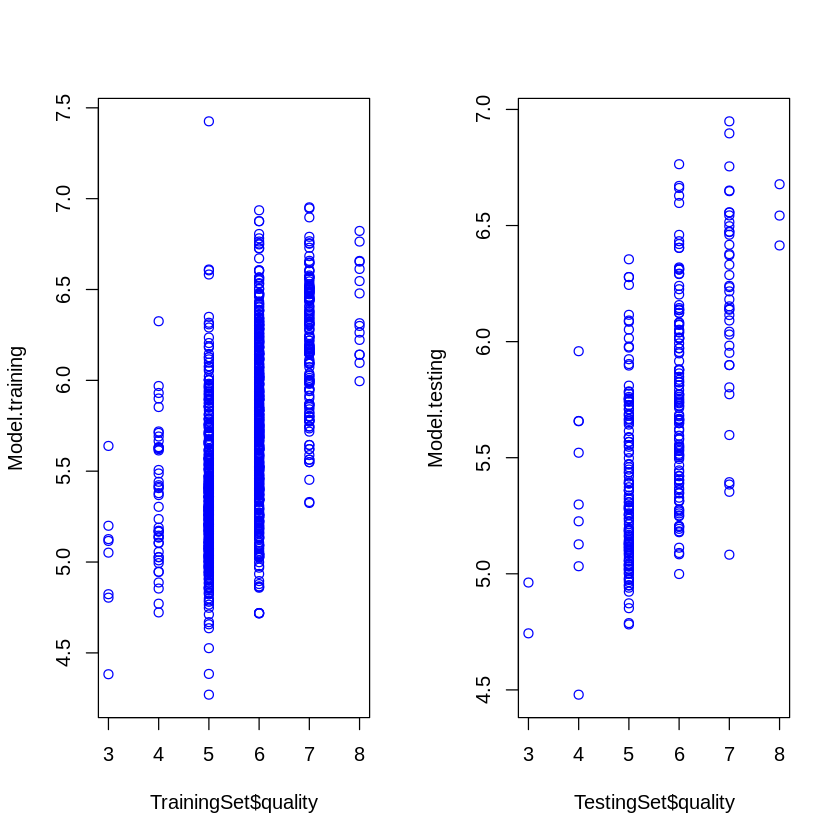

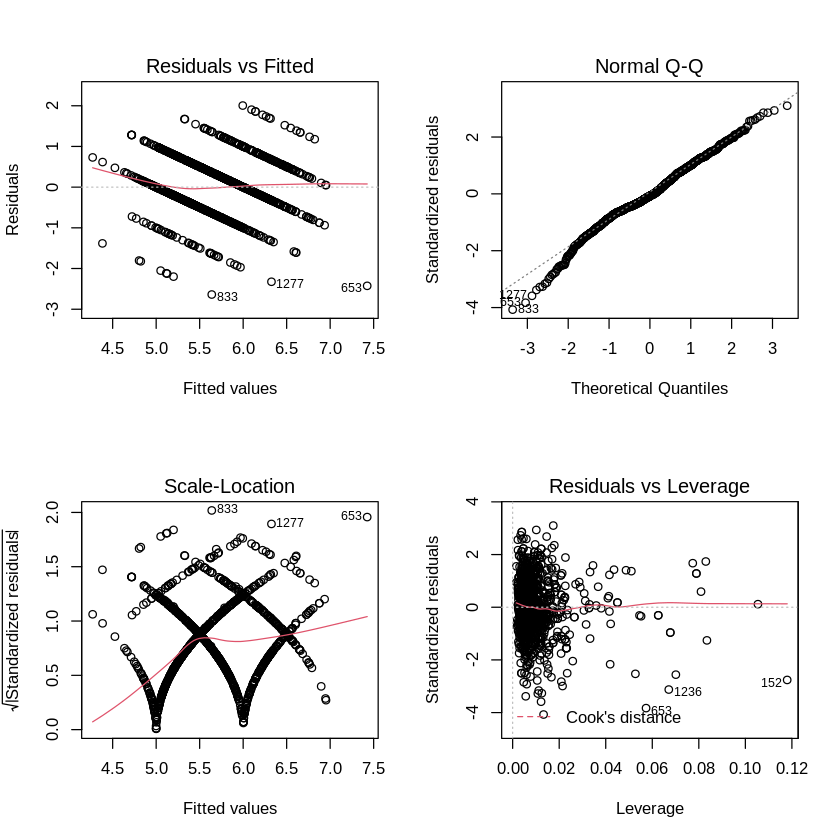

In [ ]:
# Importing libraries
library(mlbench) # Contains several benchmark data sets (especially the Boston Housing dataset)
library(caret) # Package for machine learning algorithms / CARET stands for Classification And REgression Training

Model <- lm(quality ~ ., data = TrainingSet)

Model.training <-predict(Model, TrainingSet) # Apply model to make prediction on Training set
Model.testing <-predict(Model, TestingSet) # Apply model to make prediction on Testing set

MSE <- mean((Model.testing - TestingSet$quality)^2)
MSE

summary(Model)
par(mfrow = c(1, 2))
plot(TrainingSet$quality,Model.training, col = "blue" )
plot(TestingSet$quality,Model.testing, col = "blue" )
par(mfrow = c(2, 2))
plot(Model)

---

# Classification Methods

Comparing difference for classification methods.
Collapsed column 'quality' into new column 'rating' = {low, high}

1.   Logistic Regression
2.   K Nearest Neighbor (Arjav)
3.   Decision Tree (John)
4.   SVM?

Data Preprocessing and split dataset

In [ ]:
library(dplyr)
df_class <- mutate(df, rating=case_when(
  quality %in% 0:5 ~ "low",
  quality %in% 6:10 ~ "high"
))

df_class <- df_class[ , !(names(df_class) %in% c("quality"))]

TrainingIndex <- createDataPartition(df_class$rating, p=0.8, list = FALSE)
TrainingSet <- df_class[TrainingIndex,] # Training Set
TestingSet <- df_class[-TrainingIndex,] # Test Set

# Training / Testing split
nrow(TrainingSet)
nrow(TestingSet)

# Visualize data
head(TrainingSet)

# We see 53.47% accuracy as baseline 
prop.table(table(df_class$rating))


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“`mutate_()` is deprecated as of dplyr 0.7.0.
Please use `mutate()` instead.
See vignette('programming') for more help
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


ERROR: ignored

## Logistic Regression - Baseline Performance

In [1]:
# Code Logistic Regression

Model <- glm(rating ~ ., data = TrainingSet, family = binomial)




ERROR: ignored

## Nearest Neighbor

In [ ]:
# Code Nearest Neighbor Classification

## Decision Tree

In [ ]:
# Code Decision Tree